In [1]:
#Image pre-processing 
import keras
import tensorflow as tp
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import TensorBoard


trainStuff = 'xray_dataset_covid19/train'
testStuff = 'xray_dataset_covid19/test'
dataStuff = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, rescale = 1.0/255.0,width_shift_range = 0.10, height_shift_range = 0.10)

In [2]:
trainStuff = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, rescale = 1.0/255.0,width_shift_range = 0.10, height_shift_range = 0.10).flow_from_directory(directory = trainStuff,target_size = (64,64), color_mode = "rgb")

Found 148 images belonging to 2 classes.


In [3]:
testStuff = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, rescale = 1.0/255.0,width_shift_range = 0.10, height_shift_range = 0.10).flow_from_directory(directory = testStuff,target_size = (64,64), color_mode = "rgb")  

Found 40 images belonging to 2 classes.


In [4]:
#Model Building
object1 = models.Sequential()
object1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
object1.add(layers.MaxPooling2D((2, 2)))
object1.add(layers.Conv2D(64, (3, 3), activation='relu'))
object1.add(layers.MaxPooling2D((2, 2)))
object1.add(layers.Flatten())
object1.add(layers.Dense(64,activation='relu'))
object1.add(layers.Dense(2,activation= 'sigmoid'))

In [6]:
#Compiling and fiting 
from sklearn.model_selection import train_test_split
import numpy as np

object1.compile(optimizer='adam', 
             loss=tp.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])


stuff = object1.fit(trainStuff,steps_per_epoch = 3,epochs=20,validation_data = (testStuff))


Epoch 1/20
3/3 [==============================] - 5s 2s/step - loss: 0.8042 - accuracy: 0.6250 - val_loss: 0.6611 - val_accuracy: 0.8750
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.6660 - accuracy: 0.7381 - val_loss: 0.6638 - val_accuracy: 0.5250
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 0.6635 - accuracy: 0.6786 - val_loss: 0.6156 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.6316 - accuracy: 0.5000 - val_loss: 0.5717 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6051 - accuracy: 0.7381 - val_loss: 0.5244 - val_accuracy: 0.9500
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.5558 - accuracy: 0.7976 - val_loss: 0.4641 - val_accuracy: 0.9500
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5307 - accuracy: 0.7619 - val_loss: 0.4051 - val_accuracy: 0.8500
Epoch 8/20
3/3 [=========================

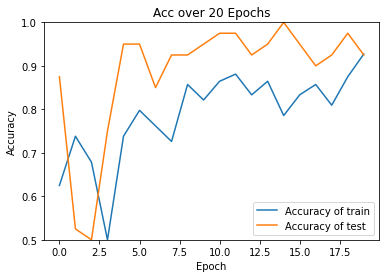

In [14]:
#Graphing
import matplotlib.pyplot as plt
plt.plot(stuff.history['accuracy'], label='Accuracy of train')
plt.plot(stuff.history['val_accuracy'], label = 'Accuracy of test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("Acc over 20 Epochs")
plt.legend(loc='lower right')


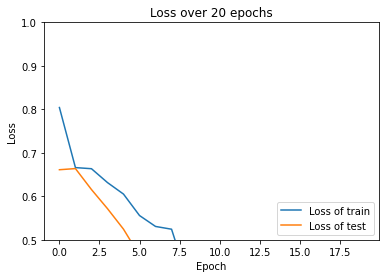

In [15]:
plt.plot(stuff.history['loss'], label='Loss of train')
plt.plot(stuff.history['val_loss'], label = 'Loss of test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over 20 epochs")
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Essentially for the analayization method for the code I founf that the train accuracy to be kinda low when compared to test accuracy. However the test accuracy had some change and started to decline and test accuracy started to increase. They both interescted at around 0.5-0.7 This didnt stay that consistent until 2.5 where they had both interesected again. Now this time test saw a rapid increase where train started to decline. However after 2.7 train started to icnrease and they both again met up at 20 epochs.

For the loss graph train had a longer loss as compared to the test they both met at 1.25 however test graph eneded earlier than the train graph.

I believe the accuracy graph displayed overfitting based on the testing line graph being bigger than the the train line graph.